# Implementing Statistics with Functions - Lab

## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will implement the code the formulas for these functions in python which will require you to use the programming skills that you have gained in first two sections of the module. So let's get started with this.

## Objectives

You will be able to:
* Create functions to model measures of central tendency and dispersion
* Perform basic statistical analysis of given data using measures of central tendency and dispersion. 

### Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv) containing weights, heights and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the pandas library to import the data into our python environment. This process will be covered in detail in the next section. Let's do this for you to give you a head start.  

In [1]:
import pandas as pd
df = pd.read_csv('nhis.csv')
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


In [1]:
# Record your initial observations on the histogram here 

We are only interested in the heigt column, so we'll save this now as a list.

In [4]:
height = df["height"]
print (len(height))
print (height)

4785
0       74
1       70
2       61
3       68
4       66
5       98
6       99
7       70
8       65
9       64
10      65
11      66
12      99
13      61
14      61
15      65
16      68
17      64
18      64
19      66
20      67
21      72
22      61
23      96
24      65
25      61
26      66
27      64
28      72
29      64
        ..
4755    61
4756    62
4757    68
4758    68
4759    66
4760    67
4761    64
4762    98
4763    75
4764    67
4765    96
4766    64
4767    64
4768    62
4769    63
4770    98
4771    60
4772    64
4773    74
4774    66
4775    64
4776    66
4777    69
4778    63
4779    70
4780    69
4781    69
4782    64
4783    64
4784    62
Name: height, Length: 4785, dtype: int64


So around 4700 records of height, thats great. How about plotting a histogram for these values. 

## Plotting Histograms

In the cell below, Import matplotlib as we saw earlier and plot a histogram of these values. Use a bin size of 8. Considering the height in inches, record your initial observations in the following cell. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


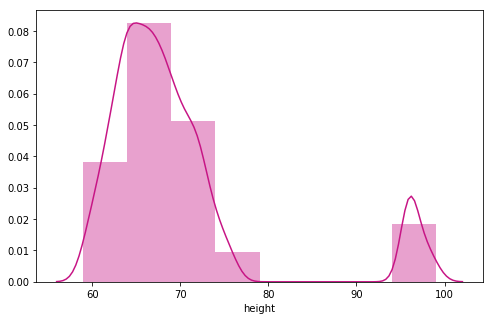

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(height, label = height, bins = 8, color = "mediumvioletred")
plt.show()

In [10]:
# Expected output below

![](index_files/index_22_0.png)

Do you spot anything unsual above , some outliers maybe ?

## Calculating mean 

So first let's calculate the mean for the height list. Recall the formula for calculating mean as shown earlier. 

![](mean.gif)

Using the python skills you have learned so far, create a function `get_mean()` to perform following tasks: 
* Input a list of numbers (like the height list we have above)
* calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

In [9]:
def get_mean(data):
    list_len = len(data)
    mean = sum(data)/list_len
    
    return round(mean,2)

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_mean(test1)) # 3
print(get_mean(test2)) # 2.5

3.0
2.5


Now we'll test the function by passing in the height list.

In [10]:
# After creating the function, pass the height list to the function 
mean = get_mean(height)

# Uncomment following command after coding the function
print("Sample Mean:", mean)

# Sample Mean: 69.58

Sample Mean: 69.58


So we have our mean length, 69.5, and this confirms our observations from the histogram. But we also some outliers in out data above and we know outliers effect the mean calculation by pulling mean value in their direction.  So let's remove these outliers and create a new list to see if our mean shifts of stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80. 
 
Perform following tasks:

* Create a function `filter_list()` that inputs a list 
* Perform a for loop to iteratively check and aappend values to a new list if < 80. 
* Return the new list 

In [11]:
def filter_list(listA):
    
    listB = []
    for item in listA:
        if item < 80:
            listB.append(item)
    
    return listB

test = [60, 70,80, 90]
filter_list(test) # [60, 70]

[60, 70]

Great, now we can filter our height list and plot a new histogram for the new list to see if things change considerably.  

In [21]:
filtered_height = filter_list(height)
fil

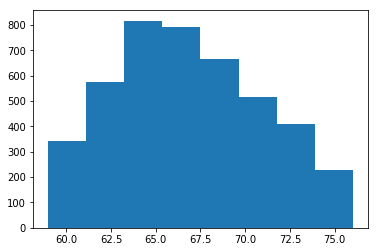

In [22]:
# Plot a histogram for the filtered list - use 8 bins as before
import matplotlib.pyplot as plt

In [23]:
# Expected output

In [24]:
# Get the mean of the new list using our get_mean() function
get_mean(height_filtered)

# 66.85

66.85

Now based on your findings before and after the outliers in mean and histogram, record your observations below:

In [44]:
# Record your observations here 

Right, in some analytical situations we may not be able to exclude the outliers in such a naive manner. So let's calculate other measures of central tendency as well. We'll move on to calculating the median value for our original height data. 

## Calculating Median 

The median is the value directly in the middle of the a dataset. In statistical terms, this is the median quartile. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number.
If the datasaet has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in an array of numbers and returns the median value for that dataset. Make sure you first check for even / odd and perform computation accordingly. So its `Sorting > checking even/odd > calculating median`. Let's give it a try. 

(Hint: you can use modulo operator `%` in python to check if a value is even or odd)

In [25]:
def get_median(data):

    data_sorted = None
    
    # Check for even/odd and perform calculations accordingly - use if-else 
   
    pass

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_median(test1)) # 3
print(get_median(test2)) # 2.5

3.0
2.5


Great, now we can pass in our height list to this function to check the median. 

In [26]:
get_median(height)
# 67

67.0

So we have 67 , which is much closer to the filtered list mean (66.85) than the mean we calculated with actual list (69.58). So median in this case seems to be a much better indicative of the central tendency found in the dataset. 

But remember we also have mode ! Maybe this can give us an even better insight into the typical values in the dataset based on how frequent a value is. So let's calculate that. 

## Calculating Mode

The mode is the value that shows up the most in a dataset. A dataset can have 0 or more modes. If no value shows up more than once, the dataset is considered to have no mode value. If two numbers show up the same number of times, that dataset is considered bimodal. Datasets where multiple values all show up the same number of times are considered multimodal.

In the cell below, write a function that takes in an list of numbers and returns another list containing the mode value(s). In case of only one mode, the list would have a single element. 

Hint: Building frequency distribution table using dictionaries is probably the easiest way to approach this problem. Use each unique element from the height list as a key, and frequency of this element as the value and build a dictionary. You can then simply identify the keys (heights) with maximum values. 

In [31]:
def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}
    
    # For all elements in the list:
    # If an element is not in the dictionary , add it with value 1
    # If an element is already in the dictionary , +1 the value
    
    
    # Create alist for mode values
    modes = []
    
    #from the dictionary, add element(s) to the modes list with max frequency

    # Return the mode list 
    return modes

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]

print(get_mode(test1)) # [5]
print(get_mode(test2)) # [1, 5]

[5]
[1, 5]


Thats done. Now can see calculate mode and compare it with our mean and median values. 

In [ ]:
get_mode(height)

So the mode value is much lower than our mean and median calculated earlier. What do you make of this? The answer to that could be subjective and depends on the problem. i.e. If your problem is to identify sizes for garments that would sell the most, you can not disregard mode. However, if you want to get an idea about the general or typical height of individuals, you can probably still do with median and average. 

To get an even clearer picture, We know we need to see how much the values deviate from the central values we have identified. We have seen variance and standard deviation before as measures of such dispersion. Let's have a go at these to strengthen our understanding around this data. 


## Calculate Variance

The formula for variance, has been shown earlier as: 
![](variance.jpg)

You are required to write a function In the cell below, that takes an array of numbers as input and returns the Variance of the sample as output.

In [19]:
def get_variance(sample):

    # First, calculate the sample mean using get_mean()
    sample_mean = None
    
    # Now, subtract the sample mean from each point and square the result. 
    
    # Divde the total by the number of items in the sample to calculate variance 
    variance = None
    
    return variance

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_variance(test1)) # 2.22
print(get_mean(test1)) # 3.33
print(get_variance(test2)) # 2.89
2.22
3.33
2.89

None
None
None


Now we can test the variance of our height list with get_variance() function. 

In [20]:
get_variance(height)
# 87.74

So this value, as we learned earlier, tells us a a bit about the deviation but not in the units of underlying data. This is because it squares the values of deviations. Standard deviation, however, can deal with this issue as it takes the square roots of differences. So that would probably be a bit more revealing. 

## Calculate Standard Deviation

In the cell below, write a function that takes an array of numbers as input and returns the standard deviation of that sample as output.

Recall that the formula for Standard Deviation is:

![](std.gif)

you would need `sqrt` method from math library to calculate the square root. 

**Note:** *Alternatively, another approach to finding the square root of a number would be to raise that number to the power of `0.5`. For example, if we wanted to find the square root of `100`, we could raise `100` to the power of `0.5`, which would give us the number `10.0`. However, **either** approach will work.*

```python
100**0.5
# 10.0

from math import sqrt
sqrt(100)
# 10.0
```

In [21]:
from math import sqrt

def get_stddev(list):

    mean = None
    
    stddev = None
    
    return stddev

test = [120,112,131,211,312,90]

print (get_stddev(test))
# 76.7

None


So now we can finally calculate stndard deviation for our height list and inspect the results. 

In [22]:
get_stddev(height)
# 9.31

So 9.3 inches is how the deviation is present in our dataset. As we are still including outlier values, this might still slightly be effected but these results are now much more reliable. 

We shall finally build a boxplot for height data and see if it agrees with our understanding for this data that we have developed up to this point. USe the matplotlib's boxplot method with height data and comment on the output 

## Build a BoxPlot

Follow the boxplot method shown earier and build a boxplot for height data. See if you can spot the outliers? Are the observations gathered from boxplot inline with our calculations? 

In [ ]:
# Build a box plot for the height data 

Text(0.5,1,'Height Data')

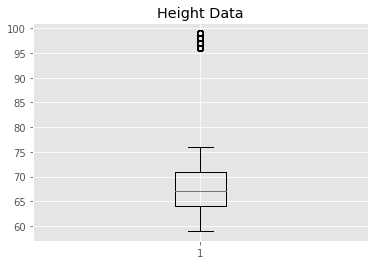

In [23]:
# Record your observations here 


### Findings
So there we have it. We have done an indepth analysis of individuals' heights using measure of central tendency of the data (67 - 68) inches, and the standard spread of the data to be around 9 inches around the mean. So we can expect half of the individuals to lie between 64 to 71 inches, as the IQR range covers 50% of the samples. These figures have been confirmed by our calculations as well as visual analysis of the data with histograms and boxplots. 

We shall learn how o further this analysis using more sophisticated statistical methods as models as we progress through the course. We shall also learn how these basic techniques provide you with a strong foundation to develop your intuitions for machine learning and predictive analysis. 

## Summary 

In this lab, we performed a basic, yet detailed statistical analysis around measuring the tendencies of center and spread in a given dataset. We looked at building a number of functions for calculate different measures and also used some statistical visualizations to strengthen our intuitions around the dataset. We shall see how we can simplify this process as we study numpy and pandas libraries to ease out the programming load while calculating basic statistics. 